In [1]:
import numpy as np
import os
CurrentPath = os.getcwd()
data_1 = np.loadtxt(CurrentPath + '/2025/data_1.txt', delimiter=' ')
X = data_1.T[0];Y = data_1.T[1]; var = data_1.T[2]

Metropolis-Hastings algorithm: 
1. Propose a prior

In [2]:
# 0 < a < 1, sigma_a = 0.0005
# -2.6 < b < -2.4, sigma_b = 0.1
# 6.7 < c < 6.9, sigma_c = 0.1
# 16 < d < 18 sigma_d = 1
from numpy import random
a_init = random.uniform(0,1)
b_init = random.uniform(-2.6,  -2.4)
c_init = random.uniform(6.7, 6.9)
d_init = random.uniform(16, 18)

2. calculate the likelihood = chisq

In [3]:
def cube(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def chisq(x0,y0,var,a,b,c,d):
    diff = (y0 - cube(x0,a,b,c,d))**2
    chisq = np.sum(diff/var)
    return chisq


3. Create a markov chain

In [4]:
from tqdm import tqdm

def Markov(paramk,paramkp1,x,y,var):
    minuschisqk = -chisq(x,y,var,paramk[0],paramk[1],paramk[2],paramk[3])/2
    minuschisqkp1 = -chisq(x,y,var,paramkp1[0],paramkp1[1],paramkp1[2],paramkp1[3])/2
    lnr = np.log(np.random.uniform(0.,1.))

    if minuschisqkp1 - minuschisqk > lnr:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : True")
        return paramkp1, minuschisqkp1
    else:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : False")
        return paramk, minuschisqk  
# 0 < a < 1, sigma_a = 0.005
# -2.6 < b < -2.4, sigma_b = 0.1
# 6.7 < c < 6.9, sigma_c = 0.1
# 16 < d < 18 sigma_d = 1
def MCMC(paraminit, nstep,normal_vec,x,y,var):
    param0 = paraminit
    arr = np.zeros((len(param0) + 1,nstep))
    for k in tqdm(range(nstep)):
        paramkp1 = np.array([param0[0] + random.normal(0,normal_vec[0]), param0[1]+ random.normal(0,normal_vec[1]),
                              param0[2]+random.normal(0,normal_vec[2]), param0[3]+random.normal(0,normal_vec[3])]) # step size
        param0, loglikelihood = Markov(param0, paramkp1,x,y,var) #loglikelihood = -chisq
        col = np.hstack((param0, loglikelihood))
        arr[:,k] = col
    return arr


In [5]:
paraminit = np.array([a_init, b_init, c_init, d_init])
nstep = int(1e7)
normal_vec = np.array([0.05, 0.1, 2, 4])
mcmcarr = MCMC(paraminit, nstep,normal_vec,X,Y,var)
bestfitind = mcmcarr[4].argmax()
bestfitparm = [mcmcarr[0][bestfitind], mcmcarr[1][bestfitind], mcmcarr[2][bestfitind], mcmcarr[3][bestfitind]]
bestfitval = mcmcarr[4][bestfitind]
print(f"bestfitparm = {bestfitparm}, bestfitval = {bestfitval}")

100%|████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:52<00:00, 42939.60it/s]

bestfitparm = [0.7501195790101105, -2.518500187741195, 7.595709683520575, 11.257004823201356], bestfitval = -539.4961153825548


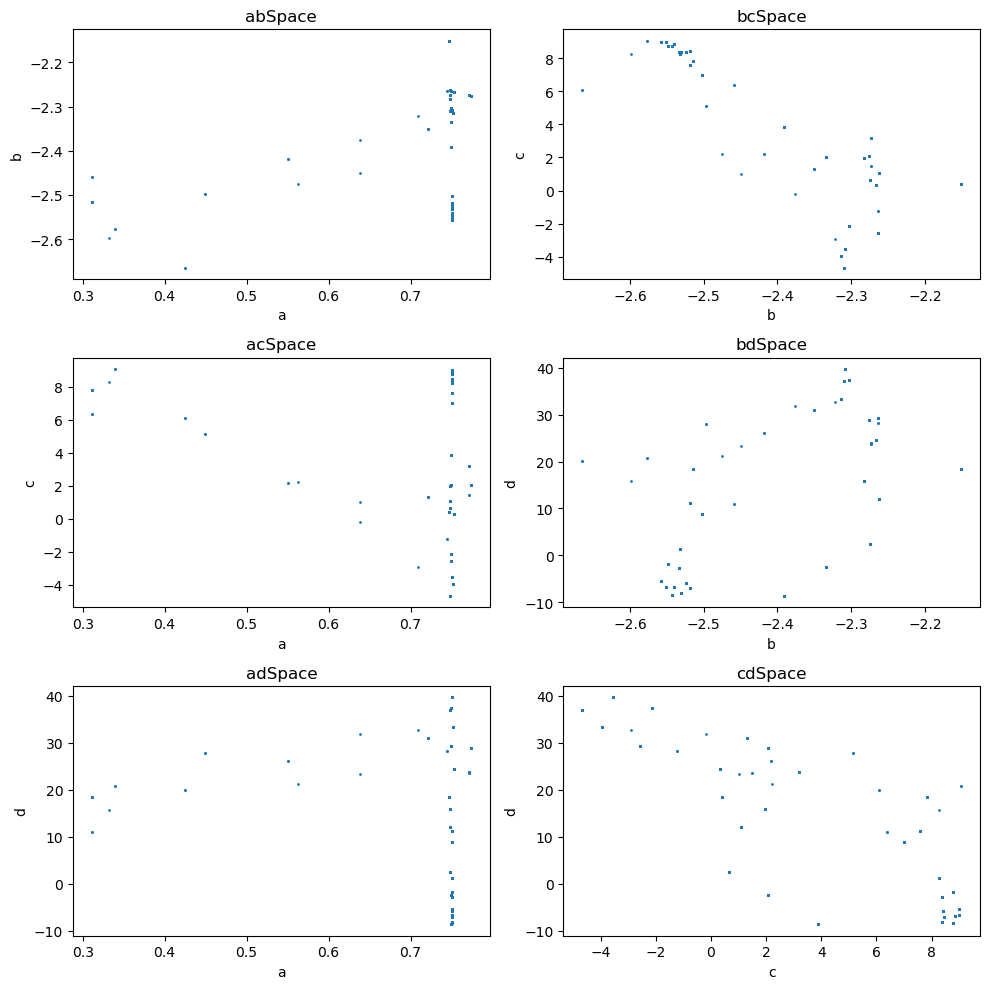

In [6]:
# 1. mcmcarr analysis
abSpace = mcmcarr[0:2,:]
acSpace = mcmcarr[[0,2],:]
adSpace = mcmcarr[[0,3],:]
bcSpace = mcmcarr[[1,2],:]
bdSpace = mcmcarr[[1,3],:]
cdSpace = mcmcarr[[2,3],:]


# scatter plot for every space in mcmcarr
import matplotlib.pyplot as plt

# 2D 히스토그램 생성
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].scatter(abSpace[0], abSpace[1], s=1)
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('abSpace')

ax[1,0].scatter(acSpace[0], acSpace[1], s=1)
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')
ax[1,0].set_title('acSpace')

ax[2,0].scatter(adSpace[0], adSpace[1], s=1)
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')
ax[2,0].set_title('adSpace')

ax[0,1].scatter(bcSpace[0], bcSpace[1], s=1)
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('bcSpace')

ax[1,1].scatter(bdSpace[0], bdSpace[1], s=1)
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_title('bdSpace')

ax[2,1].scatter(cdSpace[0], cdSpace[1], s=1)
ax[2,1].set_xlabel('c')
ax[2,1].set_ylabel('d')
ax[2,1].set_title('cdSpace')

plt.tight_layout()
plt.show()

In [7]:
abMean = np.sum(abSpace, axis = 1)/nstep
abCov = np.cov(abSpace)
acMean = np.sum(acSpace, axis = 1)/nstep
acCov = np.cov(acSpace)
adMean = np.sum(adSpace, axis = 1)/nstep
adCov = np.cov(adSpace)
bcMean = np.sum(bcSpace, axis = 1)/nstep
bcCov = np.cov(bcSpace)
bdMean = np.sum(bdSpace, axis = 1)/nstep
bdCov = np.cov(bdSpace)
cdMean = np.sum(cdSpace, axis = 1)/nstep
cdCov = np.cov(cdSpace)
print(f"abMean = {abMean}, abCov = {abCov}")
print(f"acMean = {acMean}, acCov = {acCov}")
print(f"adMean = {adMean}, adCov = {adCov}")
print(f"bcMean = {bcMean}, bcCov = {bcCov}")
print(f"bdMean = {bdMean}, bdCov = {bdCov}")
print(f"cdMean = {cdMean}, cdCov = {cdCov}")

abMean = [ 0.75019957 -2.53144   ], abCov = [[ 2.55554814e-07 -2.15039124e-06]
 [-2.15039124e-06  3.15444790e-04]]
acMean = [0.75019957 8.18836877], acCov = [[2.55554814e-07 7.87760304e-05]
 [7.87760304e-05 4.48784662e-01]]
adMean = [0.75019957 1.59939871], adCov = [[ 2.55554814e-07 -5.38250092e-04]
 [-5.38250092e-04  4.36671282e+01]]
bcMean = [-2.53144     8.18836877], bcCov = [[ 3.15444790e-04 -1.16552306e-02]
 [-1.16552306e-02  4.48784662e-01]]
bdMean = [-2.53144     1.59939871], bdCov = [[3.15444790e-04 8.34327769e-02]
 [8.34327769e-02 4.36671282e+01]]
cdMean = [8.18836877 1.59939871], cdCov = [[ 0.44878466 -3.60111283]
 [-3.60111283 43.66712821]]


Run 2nd MCMC with 1st MCMC chain as a starting point

In [8]:
nstep2 = int(1e7)
normal_vec2 = np.array([np.sqrt(np.cov(mcmcarr[0])), np.sqrt(np.cov(mcmcarr[1])), np.sqrt(np.cov(mcmcarr[2])), np.sqrt(np.cov(mcmcarr[3]))])
print(f"normal_vec2 = {normal_vec2}")
mcmcarr2 = MCMC(bestfitparm, nstep2,normal_vec2,X,Y,var)
bestfitind2 = mcmcarr2[4].argmax()
bestfitparm2 = [mcmcarr2[0][bestfitind2], mcmcarr2[1][bestfitind2], mcmcarr2[2][bestfitind2], mcmcarr2[3][bestfitind2]]
bestfitval2 = mcmcarr2[4][bestfitind2]
print(f"bestfitparm2 = {bestfitparm2}, bestfitval2 = {bestfitval2}")

normal_vec2 = [5.05524296e-04 1.77607655e-02 6.69913921e-01 6.60811079e+00]


100%|████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:49<00:00, 43619.78it/s]

bestfitparm2 = [0.7499860904043867, -2.4981485813485924, 6.730992567160952, 17.499286590538418], bestfitval2 = -7.387766669398532


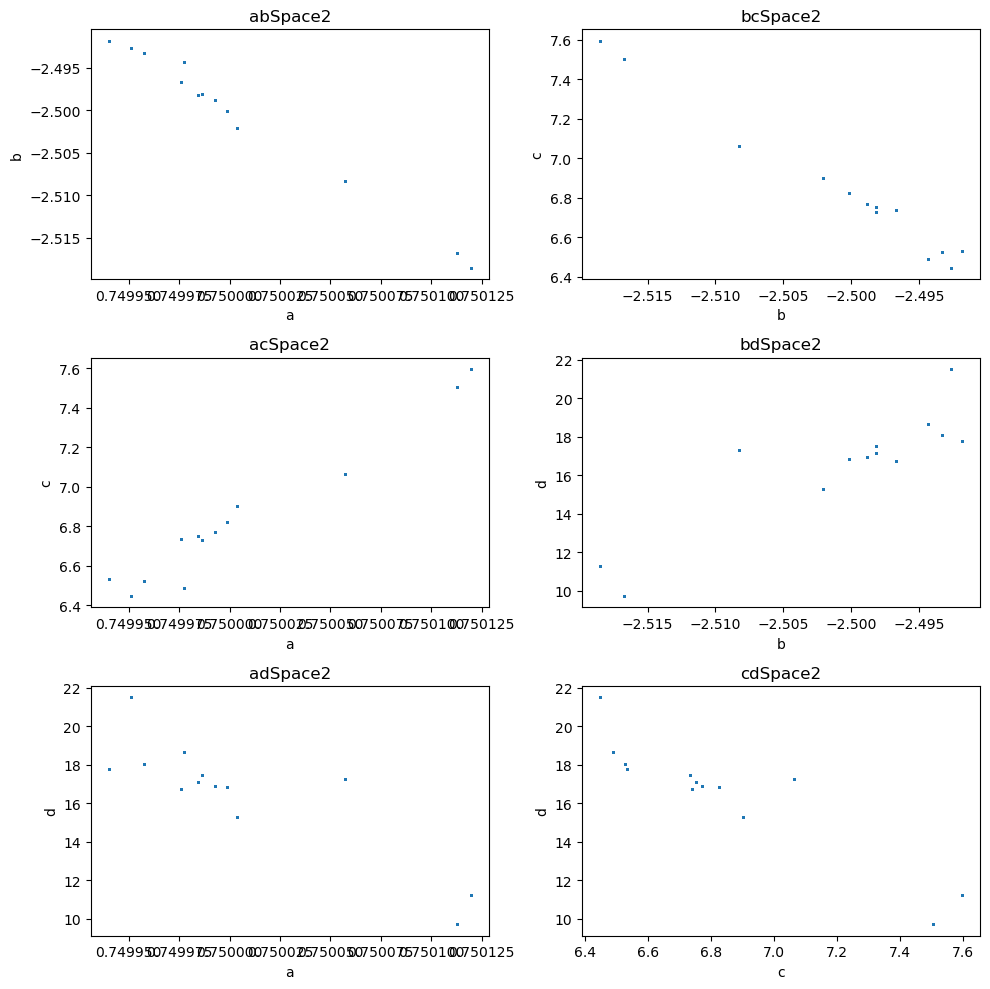

In [9]:
# mcmcarr2 analysis
abSpace2 = mcmcarr2[0:2,:]
acSpace2 = mcmcarr2[[0,2],:]
adSpace2 = mcmcarr2[[0,3],:]
bcSpace2 = mcmcarr2[[1,2],:]
bdSpace2 = mcmcarr2[[1,3],:]
cdSpace2 = mcmcarr2[[2,3],:]


fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].scatter(abSpace2[0], abSpace2[1], s=1)
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('abSpace2')

ax[1,0].scatter(acSpace2[0], acSpace2[1], s=1)
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')
ax[1,0].set_title('acSpace2')

ax[2,0].scatter(adSpace2[0], adSpace2[1], s=1)
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')
ax[2,0].set_title('adSpace2')

ax[0,1].scatter(bcSpace2[0], bcSpace2[1], s=1)
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('bcSpace2')

ax[1,1].scatter(bdSpace2[0], bdSpace2[1], s=1)
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_title('bdSpace2')

ax[2,1].scatter(cdSpace2[0], cdSpace2[1], s=1)
ax[2,1].set_xlabel('c')
ax[2,1].set_ylabel('d')
ax[2,1].set_title('cdSpace2')

plt.tight_layout()
plt.show()

In [10]:
aStd = np.sqrt(np.cov(mcmcarr2[0]))
bStd = np.sqrt(np.cov(mcmcarr2[1]))
cStd = np.sqrt(np.cov(mcmcarr2[2]))
dStd = np.sqrt(np.cov(mcmcarr2[3]))
print(f"aStd = {aStd}, bStd = {bStd}, cStd = {cStd}, dStd = {dStd}")

aStd = 9.316322785271904e-06, bStd = 0.0012973592565269977, cStd = 0.04947594660455597, dStd = 0.40583781787737794


In [11]:
# 3rd mcmc chain
nstep3 = int(1e7 + 5*1e6)
normal_vec3 = np.array([aStd, bStd, cStd, dStd])
mcmcarr3 = MCMC(bestfitparm2, nstep3,normal_vec3,X,Y,var)
bestfitind3  = mcmcarr3[4].argmax()
bestfitparm3 = [mcmcarr3[0][bestfitind3], mcmcarr3[1][bestfitind3], mcmcarr3[2][bestfitind3], mcmcarr3[3][bestfitind3]]
bestfitval3 = mcmcarr3[4][bestfitind3]
print(f"bestfitparm3 = {bestfitparm3}, bestfitval3 = {bestfitval3}")

100%|████████████████████████████████████████████████████████████████████████████| 15000000/15000000 [05:41<00:00, 43877.22it/s]

bestfitparm3 = [0.749999945411089, -2.4999371409843283, 6.794369828314169, 17.062135160002526], bestfitval3 = -1.6295308146843084


In [12]:
# 1. mcmcarr analysis
abSpace3 = mcmcarr3[0:2,:]
acSpace3 = mcmcarr3[[0,2],:]
adSpace3 = mcmcarr3[[0,3],:]
bcSpace3 = mcmcarr3[[1,2],:]
bdSpace3 = mcmcarr3[[1,3],:]
cdSpace3 = mcmcarr3[[2,3],:]

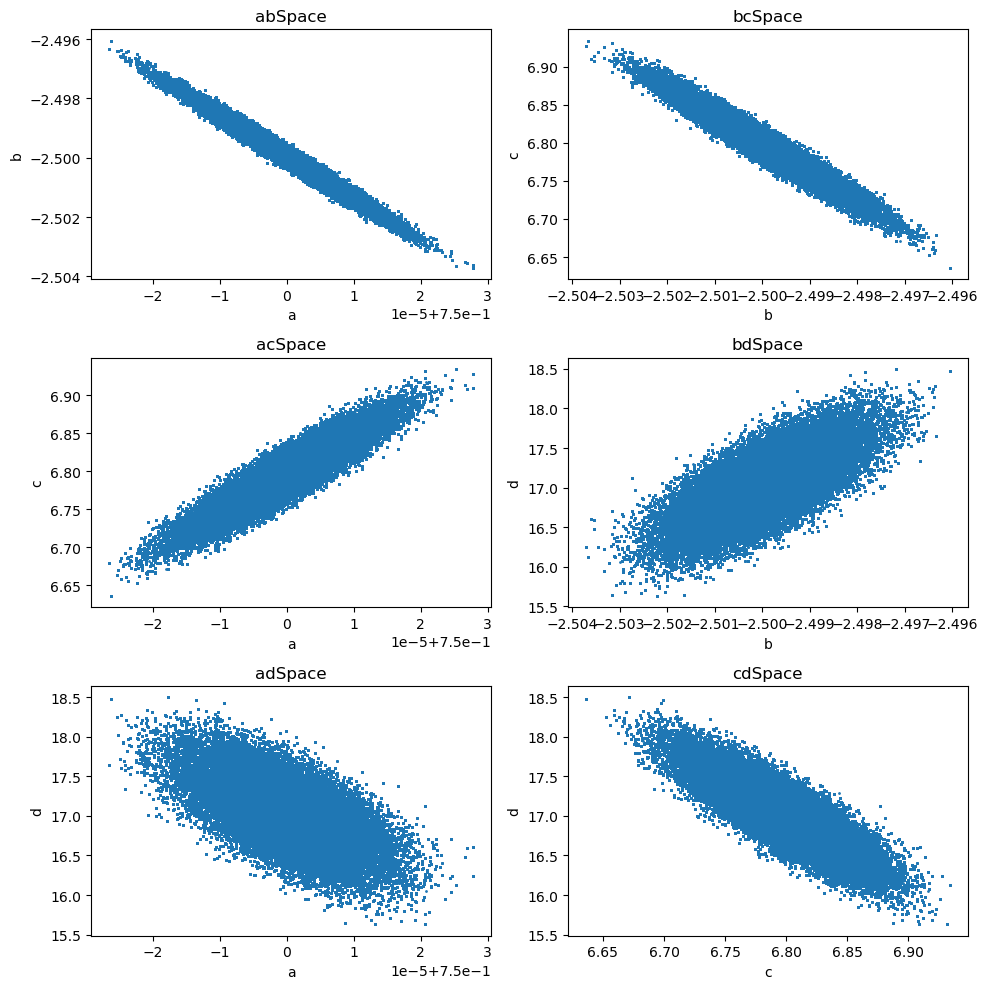

In [13]:
# 2D 히스토그램 생성
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].scatter(abSpace3[0], abSpace3[1], s=1)
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('abSpace')

ax[1,0].scatter(acSpace3[0], acSpace3[1], s=1)
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')
ax[1,0].set_title('acSpace')

ax[2,0].scatter(adSpace3[0], adSpace3[1], s=1)
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')
ax[2,0].set_title('adSpace')

ax[0,1].scatter(bcSpace3[0], bcSpace3[1], s=1)
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('bcSpace')

ax[1,1].scatter(bdSpace3[0], bdSpace3[1], s=1)
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_title('bdSpace')

ax[2,1].scatter(cdSpace3[0], cdSpace3[1], s=1)
ax[2,1].set_xlabel('c')
ax[2,1].set_ylabel('d')
ax[2,1].set_title('cdSpace')

plt.tight_layout()
plt.show()

MCMC analysis

We'll draw two kinds of ellipse with two different methods:
1. using covariance matrix
2. counting all the points and create 68%, 95%, 99% interval from cdf

  
2) Using covariance matrix
the analytical function of the ellipse is from this link:   
 https://cookierobotics.com/007/


In [14]:
# Confidence contour code

def Confidence_ellipse(ax,data, bins, confidence, color):
    """
    input : data which is 2*n array, data[0] : x values, data[1] : y values
    output : mean of the posterior, sigma_lines
    to draw a contour, use it as coutour = ax.contour(xbins, ybins, histogram, levels=sigma_lines, colors='color')
    """
    hist = plt.hist2d(data[0], data[1], bins = bins, density=True) # density histogram (normalized)
    x = (hist[1][:-1] + hist[1][1:])/2
    y = (hist[2][:-1] + hist[2][1:])/2
    dx = x[1]-x[0]
    dy = y[1]-y[0]
    dxdy = dx*dy
    dxdy = dx*dy
    # calculate the mean of the posterior
    meanPost_x = x * dxdy * np.sum(hist[0].T,axis=1)
    meanPost_y = y * dxdy * np.sum(hist[0].T, axis=0)
    # calculate the confidence interval curve
    hist_flat = np.sort(hist[0].flatten())[::-1]
    hist_cumsum = np.cumsum(hist_flat * dxdy)
    sigma_lines = hist_flat[np.searchsorted(hist_cumsum, confidence)]
    cont = ax.contour(x, y, hist[0].T, levels=[sigma_lines], colors=color)
    label,_ = cont.legend_elements()
    return [meanPost_x, meanPost_y], label

1) using covariance matrix to draw contours

In [15]:
from scipy.stats import chi2


def Confidence_ellipse_cov(ax, mean, cov, color, confidence, alpha=1):
    # 고유값과 고유벡터 계산
    eigval, eigvec = np.linalg.eig(cov)
    angle = np.arctan2(eigvec[0][1], eigvec[0][0])
    
    # 타원의 매개변수 방정식을 위한 각도 배열
    t = np.linspace(0, 2*np.pi, 100)
    # confidence level 계산
    confidence_level = chi2.ppf(confidence, 2)
    # 타원의 반지름
    width = np.sqrt(confidence_level * eigval[0])
    height = np.sqrt(confidence_level * eigval[1])
    
    # 회전하지 않은 타원의 좌표
    x_ellipse = width * np.cos(t)
    y_ellipse = height * np.sin(t)
    
    # 회전 변환 행렬
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle), np.cos(angle)]])
    
    # 회전된 좌표 계산
    xy_rotated = np.dot(R, np.array([x_ellipse, y_ellipse]))
    
    # 중심점 이동
    x_rotated = xy_rotated[0] + mean[0]
    y_rotated = xy_rotated[1] + mean[1]
    
    # 타원 그리기 (선만 그리기)
    ax.plot(x_rotated, y_rotated[::-1], color=color, label=f'{confidence*100}% Confidence', 
            linestyle='-', linewidth=2, alpha = alpha)
    handles, labels = ax.get_legend_handles_labels()
    return handles, labels
    

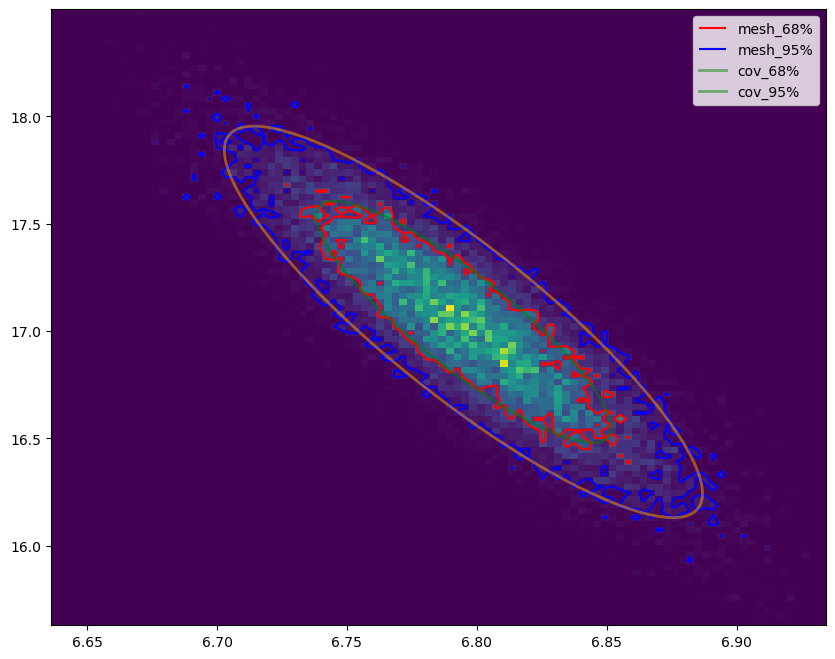

In [16]:
cdCov = np.cov(cdSpace3)
cdMean = np.mean(cdSpace3, axis=1)
fig, ax = plt.subplots(figsize = (10,8))

# ex : draw 68% and 95% contours form abSpace3
hist = np.histogram2d(cdSpace3[0], cdSpace3[1], bins = 100)
_,label1 = Confidence_ellipse(ax,cdSpace3, 100,0.68, 'red')
_,label2 = Confidence_ellipse(ax,cdSpace3, 100,0.95, 'blue')
handles_68, labels_68 = Confidence_ellipse_cov(ax, cdMean, cdCov, 'green', 0.68, alpha=0.5)
handles_95, labels_95 = Confidence_ellipse_cov(ax, cdMean, cdCov, 'orange', 0.95, alpha=0.5)
ax.legend([label1[0], label2[0], handles_68[0], handles_95[0]], ['mesh_68%', 'mesh_95%', 'cov_68%', 'cov_95%'])
plt.show()

In [17]:
# statistics for mcmcarr3
abMean = np.mean(abSpace3, axis=1)
acMean = np.mean(acSpace3, axis=1)
adMean = np.mean(adSpace3, axis=1)
bcMean = np.mean(bcSpace3, axis=1)
bdMean = np.mean(bdSpace3, axis=1)
cdMean = np.mean(cdSpace3, axis=1)

abCov = np.cov(abSpace3)
acCov = np.cov(acSpace3)
adCov = np.cov(adSpace3)
bcCov = np.cov(bcSpace3)
bdCov = np.cov(bdSpace3)
cdCov = np.cov(cdSpace3)


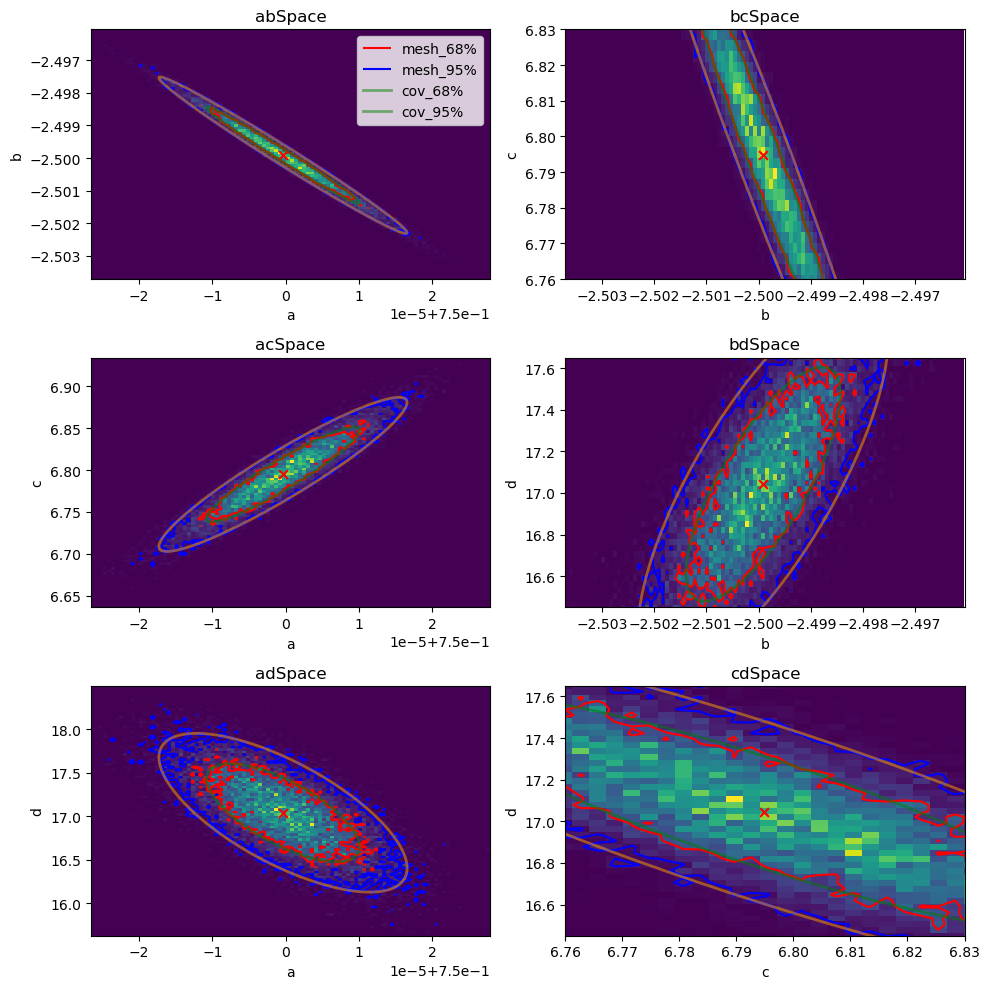

In [18]:
fig, ax = plt.subplots(3,2, figsize=(10,10))
#abSpace
ax[0,0].hist2d(abSpace3[0], abSpace3[1], bins = 100)
_,label1 = Confidence_ellipse(ax[0,0],abSpace3, 100,0.68, 'red')
_,label2 = Confidence_ellipse(ax[0,0],abSpace3, 100,0.95, 'blue')
handles_68, labels_68 = Confidence_ellipse_cov(ax[0,0], abMean, abCov, 'green', 0.68, alpha=0.5)
handles_95, labels_95 = Confidence_ellipse_cov(ax[0,0], abMean, abCov, 'orange', 0.95, alpha=0.5)
ax[0,0].scatter(abMean[0], abMean[1], s = 40, marker='x', color = 'r')

ax[0,0].set_title('abSpace')
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].legend([label1[0], label2[0], handles_68[0], handles_95[0]], ['mesh_68%', 'mesh_95%', 'cov_68%', 'cov_95%'])

#acSpace
ax[1,0].hist2d(acSpace3[0], acSpace3[1], bins = 100)
_,_ = Confidence_ellipse(ax[1,0],acSpace3, 100,0.68, 'red')
_,_ = Confidence_ellipse(ax[1,0],acSpace3, 100,0.95, 'blue')
_, _ = Confidence_ellipse_cov(ax[1,0], acMean, acCov, 'green', 0.68, alpha=0.5)
_, _ =  Confidence_ellipse_cov(ax[1,0], acMean, acCov, 'orange', 0.95, alpha=0.5)
ax[1,0].scatter(acMean[0], acMean[1],s=40,marker='x', color = 'r')

ax[1,0].set_title('acSpace')
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')

#adSpace
ax[2,0].hist2d(adSpace3[0], adSpace3[1], bins = 100)
_,_ = Confidence_ellipse(ax[2,0],adSpace3, 100,0.68, 'red')
_,_ = Confidence_ellipse(ax[2,0],adSpace3, 100,0.95, 'blue')
_, _ = Confidence_ellipse_cov(ax[2,0], adMean, adCov, 'green', 0.68, alpha=0.5)
_, _ = Confidence_ellipse_cov(ax[2,0], adMean, adCov, 'orange', 0.95, alpha=0.5)
ax[2,0].scatter(adMean[0], adMean[1],s=40,marker='x', color = 'r')

ax[2,0].set_title('adSpace')
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')

#bcSpace
ax[0,1].hist2d(bcSpace3[0], bcSpace3[1], bins = 100)
_,_ = Confidence_ellipse(ax[0,1],bcSpace3, 100,0.68, 'red')
_,_ = Confidence_ellipse(ax[0,1],bcSpace3, 100,0.95, 'blue')
_, _ = Confidence_ellipse_cov(ax[0,1], bcMean, bcCov, 'green', 0.68, alpha=0.5)
_, _ = Confidence_ellipse_cov(ax[0,1], bcMean, bcCov, 'orange', 0.95, alpha=0.5)
ax[0,1].scatter(bcMean[0], bcMean[1],s=40,marker='x', color = 'r')

ax[0,1].set_title('bcSpace')
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_ylim([6.76,6.83])

#bdSpace
ax[1,1].hist2d(bdSpace3[0], bdSpace3[1], bins = 100)
_,_ = Confidence_ellipse(ax[1,1],bdSpace3, 100,0.68, 'red')
_,_ = Confidence_ellipse(ax[1,1],bdSpace3, 100,0.95, 'blue')
_, _ = Confidence_ellipse_cov(ax[1,1], bdMean, bdCov, 'green', 0.68, alpha=0.5)
_, _ = Confidence_ellipse_cov(ax[1,1], bdMean, bdCov, 'orange', 0.95, alpha=0.5)
ax[1,1].scatter(bdMean[0], bdMean[1],s=40,marker='x', color = 'r')

ax[1,1].set_title('bdSpace')
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_ylim([16.45,17.65])

#cdSpace
ax[2,1].hist2d(cdSpace3[0], cdSpace3[1], bins = 100)
_,_ = Confidence_ellipse(ax[2,1],cdSpace3, 100,0.68, 'red')
_,_ = Confidence_ellipse(ax[2,1],cdSpace3, 100,0.95, 'blue')
_, _ = Confidence_ellipse_cov(ax[2,1], cdMean, cdCov, 'green', 0.68, alpha=0.5)
_, _ = Confidence_ellipse_cov(ax[2,1], cdMean, cdCov, 'orange', 0.95, alpha=0.5)
ax[2,1].scatter(cdMean[0], cdMean[1],s=40,marker='x', color = 'r')

ax[2,1].set_title('cdSpace')
ax[2,1].set_xlabel('c') 
ax[2,1].set_ylabel('d')
ax[2,1].set_xlim([6.76,6.83])
ax[2,1].set_ylim([16.45,17.65])

plt.tight_layout()
plt.show()

In [25]:
print(cdSpace3[0].var(), cdCov)
# Q. Is the image of the ellipse to the x, y axis same as the image of the principal axis vector to the x, y axis?
# Q. Is the covariance of the x and y axis same as the image of the ellipse to the x, y axis?


0.001414232346260543 [[ 0.00141423 -0.01222635]
 [-0.01222635  0.13887864]]


In [28]:
arr = np.array([[4,2],[2,4]])
print(np.linalg.eig(arr))

EigResult(eigenvalues=array([6., 2.]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


In [39]:
eigval, eigvec = np.linalg.eig(arr)
angle = np.arctan2(eigvec[0][1], eigvec[0][0])


# 회전 변환 행렬
R = np.array([[np.cos(angle), -np.sin(angle)],
                [np.sin(angle), np.cos(angle)]])

# 회전된 좌표 계산
xy_rotated = np.matmul(R, np.array([[eigval[0], 0],[0,eigval[1]]]))
xy_rotated

array([[ 4.24264069,  1.41421356],
       [-4.24264069,  1.41421356]])

In [37]:
R

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [38]:
6*0.70

4.199999999999999